In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [ ]:
np.random.seed(0)

In [ ]:
#training data and testing data
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
assert(X_train.shape[0]==y_train.shape[0]),"error the number of images is not the same with the label"
assert(X_test.shape[0]==y_test.shape[0]),"error the number of images is not the same with the label"
assert(X_train.shape[1:]==(28,28)),"the dimension of the image is not 28x28"
assert(X_test.shape[1:]==(28,28)),"the dimension of the image is not 28x28"

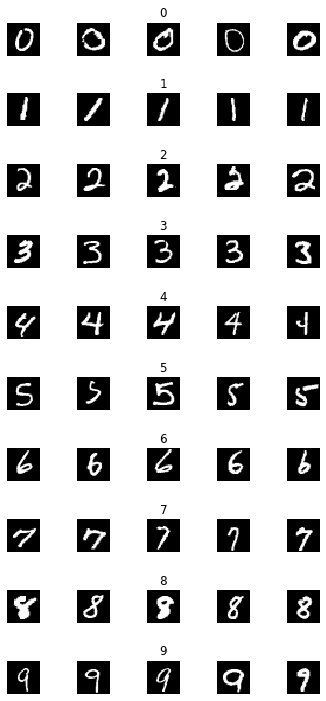

In [ ]:
num_of_samples=[]

cols=5
num_classes=10

fig,axs= plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected=X_train[y_train==j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if(i==2):
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
        

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'number of images')

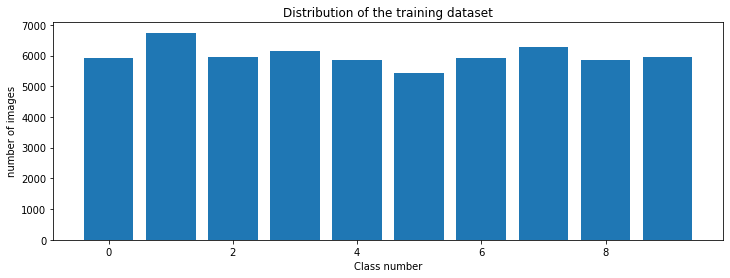

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("number of images")


In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test,10)

print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
#normalize gray pixel image into 0 and 1
X_train= X_train/255
X_test= X_test/255

In [ ]:
num_pixels=784
X_train= X_train.reshape(X_train.shape[0],num_pixels)
X_test= X_test.reshape(X_test.shape[0],num_pixels)
# print(X_train.shape)
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
def create_model():
    model=Sequential()
    model.add(Dense(10,input_dim=num_pixels, activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history= model.fit(x=X_train, y=y_train, validation_split=0.1, batch_size=200, epochs=10 , verbose=1, shuffle='true')

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.5413 - accuracy: 0.8306 - val_loss: 0.2735 - val_accuracy: 0.9218
Epoch 2/10
54000/54000 [==============================] - 1s 13us/step - loss: 0.3023 - accuracy: 0.9110 - val_loss: 0.2367 - val_accuracy: 0.9313
Epoch 3/10
54000/54000 [==============================] - 1s 12us/step - loss: 0.2749 - accuracy: 0.9194 - val_loss: 0.2288 - val_accuracy: 0.9320
Epoch 4/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.2644 - accuracy: 0.9213 - val_loss: 0.2137 - val_accuracy: 0.9348
Epoch 5/10
54000/54000 [==============================] - 1s 14us/step - loss: 0.2498 - accuracy: 0.9269 - val_loss: 0.2216 - val_accuracy: 0.9353
Epoch 6/10
54000/54000 [==============================] - 1s 12us/step - loss: 0.2479 - accuracy: 0.9281 - val_loss: 0.2148 - val_accuracy: 0.9378
Epoch 7/10
54000/54000 [==============================] - 1s 11us/ste

Text(0.5, 0, 'epoch')

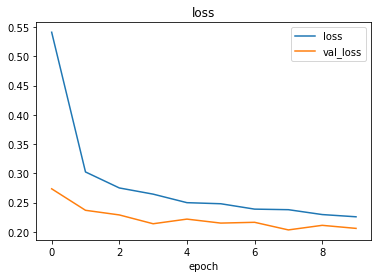

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

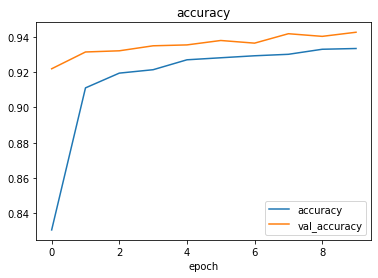

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')

In [ ]:
score= model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('test score is', score[0])
print('test accuracy is', score[1])

<class 'list'>
test score is 0.25384240528941154
test accuracy is 0.9283999800682068


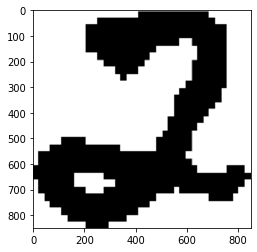

In [ ]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url,stream=True)
# print(response)
img= Image.open(response.raw)
plt.imshow(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0 118 255 255 255 255
  255 255 255 255 222   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255   2   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 254 254
  254   0 236 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0  33 255 255 255 255 255 255 255  33   0   0
    0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0  21 255 255 255 255 255  21   0   0   0
    0   0 215 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 255 255 137   0   0   0   0
    0   0 235 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   

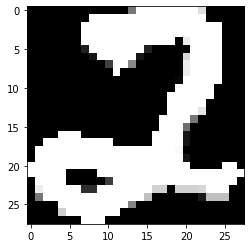

In [ ]:
import cv2

img_array= np.asarray(img) 
resized= cv2.resize(img_array,(28,28))
gray_scale=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY) #to make into 1 channel gray color 
image = cv2.bitwise_not(gray_scale)  #inverse color
plt.imshow(image,cmap=plt.get_cmap("gray")) 


print(image)

In [ ]:
#normalize image
image= image/255
image= image.reshape(1,num_pixels)
print(image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.4627451  1.         1.         1.         1.
  1.         1.         1.         1.         0.87058824 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.00784314 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         1.         1.         1.         1.         1.
  1.         1.         1.         1.   

In [ ]:
prediction = model.predict_classes(image)
print('prediction is' , str(prediction))

#the prediction is not true because likelihood has been fault with the node added or the layer added
#it will be overfitting if you try to force the prediction become the digit of '2' 
#which is not available for another prediction with different images

prediction is [3]
